In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import glob

from util import *
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Data
All data for generating plots can be downloaded from the link at the end of each published figure legends.

In [2]:
sns.set_style('ticks',rc={"linewidth": 4})
plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black'})
sns.set_context("paper")
sns.set_style("ticks")

ggp=np.array([[0.133     , 0.133     , 0.133     , 1.        ],
       [0.22953434, 0.57685998, 0.42976558, 1.        ],
       [0.57609486, 0.42953354, 0.90002989, 1.        ]])

# FIGURE 1

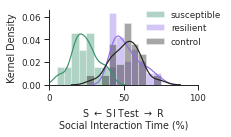

In [280]:
## Fig. 1b
d = pd.read_csv('./F1b.csv')

plt.figure(figsize=(3.3,2))
colors=[(ggp[1][0],ggp[1][1],ggp[1][2]),
       (ggp[2][0],ggp[2][1],ggp[2][2]),
       (ggp[0][0],ggp[0][1],ggp[0][2])]
for c,rsc in zip(colors,['susceptible','resilient','control']):
    
    tp=d.query('resilience=="%s"'%rsc).SI_time
    sns.distplot(tp,bins=np.arange(0,100,5),
                 label=rsc,
                 norm_hist=False,
                kde_kws={'bw':'silverman'},
                 color=c)

plt.xlim(0,100)
plt.xticks([0,50,100])
plt.xlabel(r'S $\leftarrow$ SI Test $\rightarrow$ R'+'\nSocial Interaction Time (%)',va='top')

l = plt.legend(loc='upper left',
            bbox_to_anchor=(0.6,1.1),
            title=None,frameon=0)

l.get_frame().set_facecolor('none')
sns.despine()
plt.ylabel('Kernel Density')
plt.tight_layout(h_pad=2)
plt.savefig("F1b.pdf", transparent=True)
plt.show()

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


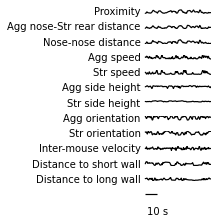

In [282]:
## Fig. 1e
sns.set_style('ticks')

d = pd.read_csv('./F1e.csv')

fig,axs=plt.subplots(nrows=len(d.columns)+1,ncols=1,figsize=(3,3),sharex=True)

t = np.arange(len(d))/120

for i,c in enumerate(d.columns):
    axs[i].plot(t,d[c],color='black',zorder=2400)

axs[-1].text(x=2,y=0.,s='\n10 s',size=10,verticalalignment='top',color='k')

for i,ax in enumerate(axs):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(x=-5,y=0,s=(list(d.columns)+[''])[i],
            horizontalalignment='right',
            verticalalignment='center',
           size=10,color='k')
    ax.set_ylim(-1.2,1.1)
    plt.xlim(-55,70)
        
axs[-1].hlines(xmin=0,xmax=12,y=0,zorder=10000,color='k')
fig.subplots_adjust(hspace=0,wspace=0,left=-0.2)

plt.tight_layout(pad=2,h_pad=-2)
sns.despine(left=True,bottom=True)
plt.savefig("F1e.pdf", transparent=True)
plt.show()

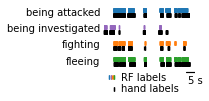

In [283]:
## Fig. 1g

d = pd.read_csv('./F1g.csv')

b2p={'fighting':'tab:orange', 
     'being attacked':'tab:blue', 
     'fleeing':'tab:green', 
     'being investigated':'tab:purple'}

border=['being attacked','being investigated', 'fighting','fleeing']

sns.set_style("white")
plt.figure(figsize=(3.,1.5))

for j,b in enumerate(border):
    u=5.5-j

    # FIND PROB WHERE CUTOFF IS BEST
    times = d.query('behavior=="%s" and RF_vs_hand=="RF"'%b).time.values
    plt.scatter(times,np.ones(len(times))*(u+1.1),marker='|',c=b2p[b])
    
    times = d.query('behavior=="%s" and RF_vs_hand=="hand"'%b).time.values
    plt.scatter(times,(u+0.8)*np.ones(len(times)),marker='|',c='k')
                

    plt.scatter([5+j,5.1+j,5.2+j],3*[2.5],marker='|',c=b2p[b])
    plt.text(0,u+1,b,fontsize=10,va='center',ha='right',color='k')
    
plt.scatter([8,8.1,8.2],3*[1.8],marker='|',c='k')

plt.text(12,2.8,'RF labels',fontsize=10,va='top',ha='left',color='k')
plt.text(12,2.1,'hand labels',fontsize=10,va='top',ha='left',color='k')

plt.plot([50,65],[2.8,2.8],color='k')
plt.text(51,2.6,'5 s',va='top',fontsize=10,color='k')


sns.despine(bottom=True,left=True)
plt.yticks([])
plt.xlim(0,55)
plt.xticks([])

plt.tight_layout()
plt.savefig("F1g.pdf", transparent=True)
plt.show()

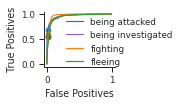

In [284]:
## Fig. 1h
sns.set_style('ticks')

d = pd.read_csv('./F1h.csv')


b2p={'fighting':'tab:orange', 
     'being attacked':'tab:blue', 
     'fleeing':'tab:green', 
     'being investigated':'tab:purple'}

border=['being attacked','being investigated', 'fighting','fleeing']


plt.figure(figsize=(2.5,1.5))

for b in border:
    d_sub = d.query('behavior == "%s"'%b)
    plt.plot(d_sub.fp,d_sub.tp,label=b,color=b2p[b])
    
    cutoff_fp, cutoff_tp = d_sub.query('is_best==1')[['fp','tp']].values[0]
    plt.scatter(cutoff_fp,cutoff_tp)
    
plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.legend(loc='center left', bbox_to_anchor=(0.2,0.45),frameon=False)
sns.despine()
plt.tight_layout()
plt.savefig("F1h.pdf", transparent=True)
plt.show()

318
18 13
being attacked 1 1.8364789431215909 0.07655763658932527
19 13
being attacked 2 -0.3881947771463167 0.7006130248312644
19 13
being attacked 3 -1.0447840828260746 0.3044686943891065
19 13
being attacked 4 -0.8930479805915074 0.3789396506576739
19 13
being attacked 5 1.3890603293207702 0.17504032113292045
19 13
being attacked 6 0.2739880280388495 0.7859715633758166
19 12
being attacked 7 0.15808628456341783 0.8754844832549331
19 13
being attacked 8 -0.14510452411547398 0.8855988632470736
19 13
being attacked 9 -0.6129782094540722 0.5445101548530582
19 13
being attacked 10 0.5657999895327672 0.5757377451305983
being attacked [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  318
Model:                                 GEE   No. clusters:                       32
Method:                        Generalized   Mi

19 12
fleeing while attacked 7 -1.6548152898570123 0.10874650854656998
19 13
fleeing while attacked 8 -1.6974893508513011 0.09995636301742317
19 13
fleeing while attacked 9 -0.9150608710629636 0.3674565863171906
19 13
fleeing while attacked 10 -0.9295927553238724 0.36000210065661853
fleeing while attacked [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  318
Model:                                 GEE   No. clusters:                       32
Method:                        Generalized   Min. cluster size:                   9
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                 9.9
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Mon, 20 Jun 2022 

<Figure size 720x720 with 0 Axes>

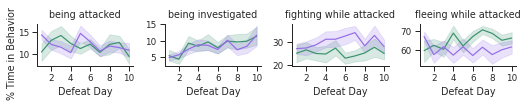

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  318
Model:                                 GEE   No. clusters:                       32
Method:                        Generalized   Min. cluster size:                   9
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                 9.9
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Mon, 20 Jun 2022   Scale:                          42.441
Covariance type:                    robust   Time:                         13:28:39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0859      0.986     12.258      0.000      10.153      14.018
si     

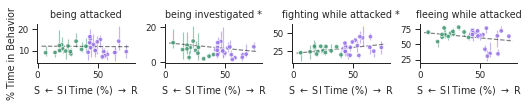

In [288]:
## Fig. 1i
border=['being attacked','being investigated', 'fighting while attacked','fleeing while attacked']
from matplotlib import rc
rc('axes', linewidth=0.75)

d = pd.read_csv('F1i.csv')
_ = make_behavior_plots(d,offset=0.5,order=border,save_names='F1i',
                    ylabel='% Time in Behavior',aspect=0.83,height=1.5)

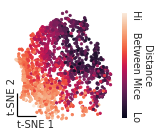

In [8]:
## Fig. 1j

sns.set_style('dark')

d = pd.read_csv('F1j.csv')

plt.figure(figsize=(2.3 ,2.))
im=plt.scatter(d['t-SNE 1'],d['t-SNE 2'],
               c=d['distance'],s=6)
cbar=plt.colorbar(im,fraction=0.046)
cbar.set_ticks([])
cbar.set_label('Distance\nHi    Between Mice    Lo',rotation=-90,va='bottom')

plt.vlines(x=-50,ymin=-42,ymax=-22,color='k')
plt.text(-50,-40.5,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10)
plt.hlines(y=-42,xmin=-50,xmax=-30,color='k')
plt.text(-50,-45,'t-SNE 1',size=10,verticalalignment='top')
plt.axis('off')
plt.tight_layout()
plt.show()

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


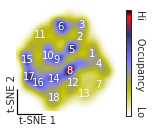

In [24]:
# Fig. 1k

from skimage.feature import peak_local_max
from skimage.morphology import watershed

# Average between mouse distance in original cluster order (for sorting)
tsne_dists=[229.70494978266953,
 245.55505578548951,
 245.12842340146145,
 166.58055751288933,
 149.51097837985458,
 250.90124233870606,
 226.49122360206243,
 141.3280762786305,
 96.60278218737608,
 128.60567565443952,
 93.26928011218547,
 175.86329471200276,
 89.84951112059038,
 90.04663779430373,
 203.50069251536658,
 57.43254248517057,
 123.0666217373827,
 92.19272510334693]


d=pd.read_csv('./F1k.csv')

viz=d.values
local_maxes = peak_local_max(viz, indices=False)
markers, n_peaks = scipy.ndimage.label(local_maxes)


# Compute watershed transform
labeled_map = watershed(-viz, markers, watershed_line=False)
labeled_map = labeled_map.astype('float64')


plt.figure(figsize=(2.2,2.2))
im=plt.imshow(viz.T,cmap='gist_stern_r',origin='lower')
xlist=[]
ylist=[]
for i in np.unique((labeled_map).flatten()):
    x=np.where(labeled_map*local_maxes.astype(int)==i)[0][0]
    y=np.where(labeled_map*local_maxes.astype(int)==i)[1][0]
    xlist.append(x)
    ylist.append(y)
    plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,size=10,
            verticalalignment='center',
            horizontalalignment='center',
            color='white')
cbar=plt.colorbar(im,fraction=0.046)
cbar.set_ticks([])
cbar.set_label('Hi      Occupancy     Lo',rotation=-90,va='bottom')

plt.vlines(x=0,ymin=-2,ymax=10,color='k')
plt.text(0,-1,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10)
plt.hlines(y=-2,xmin=0,xmax=12,color='k')
plt.text(1,-2.8,'t-SNE 1',size=10,verticalalignment='top')
plt.axis('off')
plt.show()

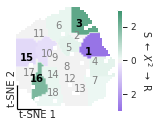

In [10]:
# Fig. 1l

d = pd.read_csv('./F1l.csv')

mx = d.values

plt.figure(figsize=(2.2,2.1))
im=plt.imshow(mx.T,origin='lower',vmin=-3,vmax=3,
            cmap=sns.diverging_palette(275, 150, s=80, l=55, as_cmap=True))

plt.vlines(x=0,ymin=-2,ymax=10,color='k')
plt.text(0,-1,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10)
plt.hlines(y=-2,xmin=0,xmax=12,color='k')
plt.text(1,-2.5,'t-SNE 1',size=10,va='top')

cbar=plt.colorbar(im,fraction=0.048,orientation='vertical',pad=0.02)
cbar.set_ticks([2,0,-2])
cbar.set_ticklabels([2,0,2])
cbar.set_label(r'S $\leftarrow$ $X^2$ $\rightarrow$ R',rotation=-90,va='bottom')
plt.axis('off')

for i in range(1,19):
    x=np.where(labeled_map*local_maxes.astype(int)==i)[0][0]
    y=np.where(labeled_map*local_maxes.astype(int)==i)[1][0]
    if np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1 in [1,3,15,16]:
        plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
                 size=10,
                verticalalignment='center',
                horizontalalignment='center',
                color='k', weight='bold')
    else:
        plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
                 size=10,
                verticalalignment='center',
                horizontalalignment='center',
                color='grey')

plt.show()

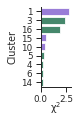

In [292]:
# Fig. 1m

d = pd.read_csv('./F1m.csv')

chi = d.chi_stat.values
labels_order = d.cluster.values
scale = d.RorS.values

sns.set_style("ticks")
f,ax=plt.subplots(1,1,figsize=(1.2,1.8))
sns.barplot(x=chi[(np.argsort(chi)[::-1])],y=['i'+str(i) for i in np.arange(18)],
            palette=[ggp[int(scale[i]!=-1)*2-1] for i in np.argsort(chi)[::-1]])
plt.ylim(8.5,-0.5)
ax.set_yticklabels(labels_order[(np.argsort(chi)[::-1])])
sns.despine()
plt.xlabel('$\chi^2$',va='center')
plt.ylabel('Cluster')
plt.savefig("F1m.pdf", transparent=True)
plt.show()

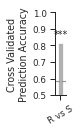

In [291]:
# Fig. 1n

d = pd.read_csv('./F1n.csv').values

sns.set_style('ticks')
plt.figure(figsize=(1.2,1.9))
plt.bar(x=['R vs S'],height=[np.sum(d)/len(d)],
        color='darkgrey',alpha=0.9)
plt.ylim(0.5,1)
plt.xlim(-0.8,0.8)
plt.yticks([0.5,0.6,0.7,0.8,0.9,1.0])
# plt.axhline(y=0.5,linestyle='--',color='k',alpha=0.8)
plt.axhline(y=0.5-0.085,linestyle='--',color='grey',alpha=0.8)
plt.axhline(y=0.5+0.085,linestyle='--',color='grey',alpha=0.8)
sns.despine()
plt.xticks(rotation=30)
# plt.xlabel('Behaviors Used')
# plt.title('Resilient/Susceptible\nDecoder')
plt.ylabel('Cross Validated\nPrediction Accuracy')
# plt.text(0,0.9,'NS',ha='center')
plt.text(0,0.85,'***',ha='center')
plt.savefig("F1n.pdf", transparent=True)
plt.show()

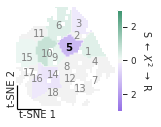

In [13]:
# Fig. 1l

d = pd.read_csv('./F1t.csv')

mx = d.values


sns.set_style("dark")
plt.figure(figsize=(2.2,2.1))

im=plt.imshow(mx.T,origin='lower',vmin=-3,vmax=3,
            cmap=sns.diverging_palette(275, 150, s=80, l=55, as_cmap=True))

plt.vlines(x=0,ymin=-2,ymax=10,color='k')
plt.text(0,-1,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10)
plt.hlines(y=-2,xmin=0,xmax=12,color='k')
plt.text(1,-2.5,'t-SNE 1',size=10,va='top')

cbar=plt.colorbar(im,fraction=0.048,orientation='vertical',pad=0.02)
cbar.set_ticks([2,0,-2])
cbar.set_ticklabels([2,0,2])
cbar.set_label(r'S $\leftarrow$ $X^2$ $\rightarrow$ R',rotation=-90,va='bottom')
plt.axis('off')

for i in range(1,19):
    x=np.where(labeled_map*local_maxes.astype(int)==i)[0][0]
    y=np.where(labeled_map*local_maxes.astype(int)==i)[1][0]
    if np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1 in [5]:
        plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
                 size=10,
                verticalalignment='center',
                horizontalalignment='center',
                color='k', weight='bold')
    else:
        plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
                 size=10,
                verticalalignment='center',
                horizontalalignment='center',
                color='grey')
        
plt.show()

80
4 4
t-SNE 5 1 1.5613005563594766 0.16947606713370855
4 4
t-SNE 5 2 1.3896394982189137 0.21400903447541264
4 4
t-SNE 5 3 1.108630384813821 0.3100390775740136
4 4
t-SNE 5 4 1.04450547992312 0.3364955561343124
4 4
t-SNE 5 5 -0.9660839098413284 0.3713113758627095
4 4
t-SNE 5 6 -0.013340096405780424 0.9897889691696224
4 4
t-SNE 5 7 1.8283511856935548 0.11725571421409174
4 4
t-SNE 5 8 2.6990861704622393 0.03561928293112404
4 4
t-SNE 5 9 0.8755756197988341 0.41493318053302064
4 4
t-SNE 5 10 0.8614710675362566 0.422066238495978
t-SNE 5 [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                   80
Model:                                 GEE   No. clusters:                        8
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:  

<Figure size 720x720 with 0 Axes>

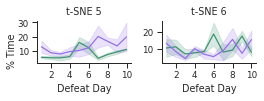

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                   80
Model:                                 GEE   No. clusters:                        8
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Mon, 20 Jun 2022   Scale:                          68.546
Covariance type:                    robust   Time:                         13:57:22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7107      1.026      6.541      0.000       4.700       8.721
si     

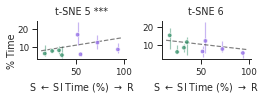

In [293]:
## Fig. 1u

d = pd.read_csv('F1u.csv')

_ = make_behavior_plots(d,offset=0.5,order=['t-SNE 5','t-SNE 6'],save_names='F1u',
                    ylabel='% Time',aspect=0.83,height=1.5)

# FIGURE 2

TS -5.517116296402465 5.411086911315233e-06


/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:76: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


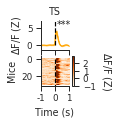

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


NAc -1.5271216451910163 0.13720632713420797


/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:76: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


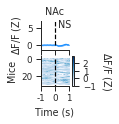

In [295]:
## Fig. 2b

d=pd.read_csv('./F2b.csv')


sns.set_context("paper")
sns.set_style("ticks")
onoff_titles=['Onset','Offset']

cols={'NAc':"Blues",
     'TS':'Oranges'}
pcols={'NAc':"dodgerblue",
     'TS':'orange'}
stars={'NAc':'NS',
       'TS':'***'}

for i,region in enumerate(['TS','NAc']):
    
    fig,axs=plt.subplots(nrows=2,ncols=1,figsize=(0.6,1.5),sharex=True)
    side=0


    query='region=="%s"'%(region)

    im= d.query(query)[[str(i) for i in range(59)]].values
    
    T,p = ttest_rel(im[:,:30].mean(axis=1),
                    im[:,30:].mean(axis=1))
    print(region,T,p)
    
    im=[i for i in im if len(i)]
    order=np.argsort([np.sum(i) for i in im])
    np.random.shuffle(order)
    im2=axs[1].imshow(np.array(im)[order],aspect='auto',cmap=cols[region],vmin=-1,vmax=3,
                     interpolation='None')

    mean_im=np.mean(im,axis=0)
    se_im=scipy.stats.sem(im,axis=0)
    axs[0].plot(mean_im,color=pcols[region])
    axs[0].fill_between(x=np.arange(len(mean_im)),y1=mean_im+se_im,y2=mean_im-se_im,
                        color=pcols[region],alpha=0.5)
    axs[0].set_ylim(-1.5,7)
    axs[1].set_yticks([tick for tick in axs[i].get_yticks() if tick>=0])

    axs[1].set_ylim(len(im),-int(len(im))/10)

    axs[1].plot((30,30),(0,len(im)),linestyle='--',color='black')
    axs[0].plot((30,30),(0,len(im)),linestyle='--',color='black')
    
    axs[0].text(40,4.5,stars[region],va='bottom',ha='center')
    

    sns.despine(ax=axs[0])
    sns.despine(ax=axs[1])
    

    cbar_ax = inset_axes(axs[1],
               width="10%",  # width = 5% of parent_bbox width
               height="100%",  # height : 50%
               loc='lower left',
               bbox_to_anchor=(1.1, 0., 1, 1),
               bbox_transform=axs[1].transAxes,
               borderpad=0)
    cbar=fig.colorbar(im2, cax=cbar_ax,ticks=[-1, 0, 1, 2])
    cbar.set_label('$\Delta$F/F (Z)',rotation=270,va='bottom')

    axs[0].set_ylabel('$\Delta$F/F (Z)')
    axs[0].set_title('%s'%region)
    axs[1].set_xlim(15,45)
    axs[1].set_xticks([15*k for k in [1,2,3]])
    axs[1].set_xticklabels([-1,0,1])
    axs[-1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Mice')
    axs[1].set_yticks([0,20])
    plt.gcf().subplots_adjust(top=0.8,left=0.25,bottom=0.2)
    plt.savefig("F2b_%s.pdf"%region, transparent=True,bbox_inches='tight')
    plt.show()


TS -2.3627386837471738 0.025321772254251775


/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


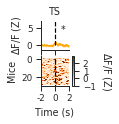

NAc -6.588902292625216 3.8100236675489227e-07


/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


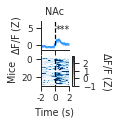

In [296]:
## Fig. 2b

d=pd.read_csv('./F2c.csv')

sns.set_context("paper")
sns.set_style("ticks")
onoff_titles=['Onset','Offset']

cols={'NAc':"Blues",
     'TS':'Oranges'}
pcols={'NAc':"dodgerblue",
     'TS':'orange'}
stars={'NAc':'***',
       'TS':'*'}

for i,region in enumerate(['TS','NAc']):
    
    fig,axs=plt.subplots(nrows=2,ncols=1,figsize=(0.6,1.5),sharex=True)
    side=0


    query='region=="%s"'%(region)

    im= d.query(query)[[str(i) for i in range(113)]].values
    
    T,p = ttest_rel(im[:,:56].mean(axis=1),
                    im[:,56:].mean(axis=1))
    print(region,T,p)
    
    im=[i for i in im if len(i)]
    order=np.argsort([np.sum(i) for i in im])
    np.random.shuffle(order)
    im2=axs[1].imshow(np.array(im)[order],aspect='auto',cmap=cols[region],vmin=-1,vmax=3,
                     interpolation='None')

    mean_im=np.mean(im,axis=0)
    se_im=scipy.stats.sem(im,axis=0)
    axs[0].plot(mean_im,color=pcols[region])
    axs[0].fill_between(x=np.arange(len(mean_im)),y1=mean_im+se_im,y2=mean_im-se_im,
                        color=pcols[region],alpha=0.5)
    axs[0].set_ylim(-1.5,7)
    axs[1].set_yticks([tick for tick in axs[i].get_yticks() if tick>=0])

    axs[1].set_ylim(len(im),-int(len(im))/10)

    axs[1].plot((113/2,113/2),(0,len(im)),linestyle='--',color='black')
    axs[0].plot((113/2,113/2),(0,len(im)),linestyle='--',color='black')
    
    axs[0].text(89,3,stars[region],va='bottom',ha='center')
    

    sns.despine(ax=axs[0])
    sns.despine(ax=axs[1])
    

    cbar_ax = inset_axes(axs[1],
               width="10%",  # width = 5% of parent_bbox width
               height="100%",  # height : 50%
               loc='lower left',
               bbox_to_anchor=(1.1, 0., 1, 1),
               bbox_transform=axs[1].transAxes,
               borderpad=0)
    cbar=fig.colorbar(im2, cax=cbar_ax,ticks=[-1, 0, 1, 2])
    cbar.set_label('$\Delta$F/F (Z)',rotation=270,va='bottom')

    axs[0].set_ylabel('$\Delta$F/F (Z)')
    axs[0].set_title('%s'%region)
    axs[1].set_xticks([113/2*k for k in [0,1,2]])
    axs[1].set_xticklabels([-2,0,2])
    axs[-1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Mice')
    axs[1].set_yticks([0,20])
    plt.gcf().subplots_adjust(top=0.8,left=0.25,bottom=0.2)
    plt.savefig("F2c_%s.pdf"%region, transparent=True,bbox_inches='tight')
    plt.show()


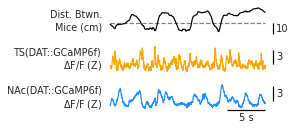

In [298]:
## Fig. 2d

d = pd.read_csv('./F2d.csv')

tfp = d.query('signal_type=="NAc"').time.values
nac = d.query('signal_type=="NAc"').trace.values
ts = d.query('signal_type=="TS"').trace.values
tb = d.query('signal_type=="distance"').time.values
dist = d.query('signal_type=="distance"').trace.values


fig,axs=plt.subplots(nrows=3,ncols=1,figsize=(4.2,1.9),sharex=True)

axs[0].plot(tb,dist,color='black',zorder=100)
axs[0].hlines(y=10.4,xmin=0,xmax=20,color='grey',linestyle='--')

axs[1].plot(tfp,ts,
           color='orange',zorder=100)

axs[2].plot(tfp,nac,
           color='dodgerblue',zorder=100)

axs[2].hlines(xmin=15,xmax=20,y=-2,color='k')
axs[2].text(x=17.5,y=-2.5,s='5 s',size=10,verticalalignment='top',horizontalalignment='center')

sns.despine(left=True,bottom=True)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
labs=['Dist. Btwn.\nMice (cm)','TS(DAT::GCaMP6f)\n$\Delta$F/F (Z)','NAc(DAT::GCaMP6f)\n$\Delta$F/F (Z)']#['SN-TS\nZ-scored\nGCaMP','VTA-NAc\nZ-scored\nGCaMP','Centroid\nDistance','Behavior']
yticks=[[0,10],
        [0,3],
       [0,3],
       ]
ticklabs=[r'%d',
       r'%d',
       '%d']
for i,ax in enumerate(axs):
    ax.set_xticks([])
    ax.set_yticks([])
    h=ax.set_ylabel(labs[i],rotation=0,labelpad=0,ha='right',va='center')
    h.set_rotation(0)
    if len(yticks[i])!=0:
        ax.vlines(x=21,ymin=yticks[i][0],ymax=yticks[i][1],color='k')
        ax.text(x=21.4,y=yticks[i][0]+(yticks[i][1]-yticks[i][0])/2,
                s=ticklabs[i]%(yticks[i][1]-yticks[i][0]),size=10,
               verticalalignment='center',horizontalalignment='left')

plt.savefig("F2d.pdf", transparent=True)
        
plt.show()

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


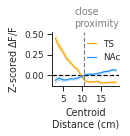

In [300]:
## Fig. 2e

d = pd.read_csv('./F2e.csv')

sns.set_context("paper")
sns.set_style('ticks')
fig,ax=plt.subplots(1,1,figsize=(1.2,1.))
plt.axhline(y=0,color='k',linestyle='--')
for region,color in zip(["TS","NAc"],
                        ['orange','dodgerblue']):
    dsub = d.query('region=="%s"'%region)
    dist = dsub['distance']
    m = dsub['mean']
    s = dsub['sem']
    plt.plot(dist, m, label=region,color=color)
    plt.fill_between(dist, m-s,m+s, color=color, alpha=0.2)

sns.despine()
plt.ylabel('Z-scored $\Delta$F/F')
plt.xlabel('Centroid\nDistance (cm)')
l = plt.legend(bbox_to_anchor=(0.4,0.3),
            title=None,frameon=0,handlelength=1)

plt.axvline(x=10.5,linestyle='--',color='grey')
plt.text(x=8,y=0.6,s='close\nproximity',color='grey')
plt.savefig("F2e.pdf", transparent=True,bbox_inches='tight')
plt.show()

F2f_male.csv


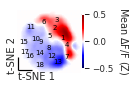

F2f_female.csv


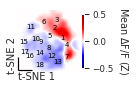

In [306]:
## Fig. 2f

sns.set_context("paper")
sns.set_style('dark')

for d_file in glob.glob('F2f*.csv'):
    sex = d_file.split('.')[0].split('_')[1]
    print(d_file)
    
    d = pd.read_csv(d_file)
    
    image = d.values
    
    plt.figure(figsize=(2,1.8))
    
    im=plt.imshow(image,origin='lower',cmap='seismic',
              vmin=-0.5,vmax=0.5)
    
    
    cbar=plt.colorbar(im,fraction=0.04,orientation='vertical',pad=0.02,label='Log Odds of Peak')
    cbar.ax.set_ylabel('Mean $\Delta$F/F (Z)',rotation=-90,va='bottom')
    cbar.set_ticks([-0.5,0,0.5])

    for i in np.unique((labeled_map).flatten()):
        x=np.where(labeled_map*local_maxes.astype(int)==i)[0][0]
        y=np.where(labeled_map*local_maxes.astype(int)==i)[1][0]
        xlist.append(x)
        ylist.append(y)
        plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,size=7,
                verticalalignment='center',
                horizontalalignment='center',
                color='k')
        
    plt.vlines(x=1,ymin=2,ymax=12,color='k')
    plt.text(0,-1,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10)
    plt.hlines(y=2,xmin=1,xmax=12,color='k')
    plt.text(0.5,-6,'t-SNE 1',size=10)
    plt.axis('off')
    plt.savefig("F2f_%s.pdf"%sex, transparent=True,bbox_inches='tight')
    plt.show()

F2g_female.csv


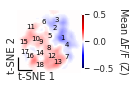

F2g_male.csv


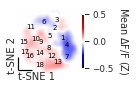

In [305]:
## Fig. 2g

sns.set_context("paper")
sns.set_style('dark')

for d_file in glob.glob('F2g*.csv'):
    
    sex = d_file.split('.')[0].split('_')[1]
    print(d_file)
    
    d = pd.read_csv(d_file)
    
    image = d.values
    
    plt.figure(figsize=(2,1.8))
    
    im=plt.imshow(image,origin='lower',cmap='seismic',
              vmin=-0.5,vmax=0.5)
    
    
    cbar=plt.colorbar(im,fraction=0.04,orientation='vertical',pad=0.02,label='Log Odds of Peak')
    cbar.ax.set_ylabel('Mean $\Delta$F/F (Z)',rotation=-90,va='bottom')
    cbar.set_ticks([-0.5,0,0.5])

    for i in np.unique((labeled_map).flatten()):
        x=np.where(labeled_map*local_maxes.astype(int)==i)[0][0]
        y=np.where(labeled_map*local_maxes.astype(int)==i)[1][0]
        xlist.append(x)
        ylist.append(y)
        plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,size=7,
                verticalalignment='center',
                horizontalalignment='center',
                color='k')
        
    plt.vlines(x=1,ymin=2,ymax=12,color='k')
    plt.text(0,-1,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10)
    plt.hlines(y=2,xmin=1,xmax=12,color='k')
    plt.text(0.5,-6,'t-SNE 1',size=10)
    plt.axis('off')
    plt.savefig("F2g_%s.pdf"%sex, transparent=True,bbox_inches='tight')
    plt.show()

# FIGURE 3

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


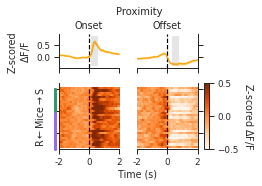

In [71]:
## Fig. 3a

sns.set_context("paper")
sns.set_style('white')

cols={'VTA-NAc':"Blues",
     'SN-TS':'Oranges'}
linecols={'VTA-NAc':'dodgerblue',
        'SN-TS':'orange'}
onoff_titles=['Onset','Offset']
sizes={'SN-TS':(3,2.6),
       'VTA-NAc':(3,2.6)}
title_poses={'SN-TS':0.55,
             'VTA-NAc':0.52}
peak_locs={'VTA-NAc':(317, 323),
           'SN-TS':(283,306)}

ns=11
nr=16


region = "SN-TS"

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=sizes[region],sharex=True,sharey='row',gridspec_kw={
                       'width_ratios': [1, 1],
                       'height_ratios': [1, 2]})
im2s=[]
for j,onoff in enumerate(['onset','offset']):

    side=int(onoff=='offset')

    query='group=="GCaMP" and region=="%s" and onoff=="%s"'%(region,onoff)

    im=pd.read_csv('./F3a_%s.csv'%onoff).values
    
    im2=axs[1][j].imshow(im,aspect='auto',cmap=cols[region],vmin=-0.5,vmax=0.5,interpolation='None')

    im2s.append(im2)
    axs[1][j].set_xticks([0,240,479])
    axs[1][j].set_xticklabels([-2,0,2])
    axs[1][j].set_yticks([tick for tick in axs[1][j].get_yticks() if tick>=0])

    axs[1][j].set_ylim(len(im),-int(len(im))/10)

    axs[1][j].plot((240,240),(0,len(im)),linestyle='--',color='k')
    axs[0][j].axvline(x=240,linestyle='--',color='black')
    axs[0][j].set_title(onoff_titles[j])
    plt.suptitle('Proximity',size=10,va='top',ha='left',y=0.91,x=title_poses[region])

    for k in range(2):
        sns.despine(ax=axs[k][1])#,right=False,left=True)
        axs[k][1].spines['left'].set_visible(False)
        axs[k][1].spines['right'].set_visible(True)
        axs[k][1].yaxis.tick_right()
        axs[k][0].yaxis.tick_left()
        axs[k][0].xaxis.tick_bottom()
        axs[k][1].xaxis.tick_bottom()
        sns.despine(ax=axs[k][0])



    means=np.mean(np.array(im),axis=0)
    sterrs=scipy.stats.sem(np.array(im),axis=0)
    axs[0][j].plot(means,color=linecols[region])
    axs[0][j].fill_between(np.arange(len(means)),
                           means-sterrs,
                           means+sterrs,
                           color=linecols[region],
                          alpha=0.5)

    axs[1][1].set_yticklabels([])
    axs[1][0].set_ylabel(r'R$\leftarrow$Mice$\rightarrow$S')
    axs[0][0].set_ylabel('Z-scored\n$\Delta$F/F')
    trans = axs[1][0].get_yaxis_transform()

    axs[1][0].plot([-0.05,-0.05],[0,ns], color=ggp[1], transform=trans, clip_on=False,linewidth=3)
    axs[1][0].plot([-0.05,-0.05],[ns,ns+nr], color=ggp[2], transform=trans, clip_on=False,linewidth=3)

    if i:
        rect = patches.Rectangle((peak_locs[region][j]-30,-0.4),60,1.3,linewidth=0,
                                 alpha=0.2,facecolor='grey')
    else:
        rect = patches.Rectangle((peak_locs[region][j]-30,-0.3),60,0.6,linewidth=0,
                     alpha=0.2,facecolor='grey')
    axs[0][j].add_patch(rect)

cbar_ax = inset_axes(axs[1][1],
           width="8%",  # width = 5% of parent_bbox width
           height="100%",  # height : 50%
           loc='lower left',
           bbox_to_anchor=(1.1, 0., 1, 1),
           bbox_transform=axs[1][1].transAxes,
           borderpad=0,
           )
cbar=fig.colorbar(im2s[1], cax=cbar_ax,ticks=[-0.5, 0, 0.5,1])
cbar.set_label('Z-scored $\Delta$F/F',rotation=-90,va='bottom')
fig.text(0.65, 0.0, 'Time (s)', ha='center')

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=None)
for ax in plt.gcf().axes:
    try:
        ax.label_outer()
    except:
        pass
plt.savefig("F3a.pdf", transparent=True,bbox_inches='tight')
plt.show()

260
15 10
onset 1 -0.39128805194591987 0.6991857777787931
15 10
onset 2 -0.8353390480904075 0.4121205921321006
16 11
onset 3 -0.6786015359595989 0.5036242707812444
16 11
onset 4 -0.04545078563994147 0.9641091134083034
16 11
onset 5 -1.0035874088495167 0.32519301934782974
16 10
onset 6 -0.7581152607264106 0.4557624232957209
15 10
onset 7 -0.4793796318789818 0.636195310102206
15 11
onset 8 0.07654585454838791 0.9396193789523306
16 10
onset 9 0.4493684991577503 0.6571978126233395
15 11
onset 10 0.24170317994526538 0.811063424765783
onset [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  260
Model:                                 GEE   No. clusters:                       27
Method:                        Generalized   Min. cluster size:                   8
                      Estimating Equations   Max. cluster siz

<Figure size 720x720 with 0 Axes>

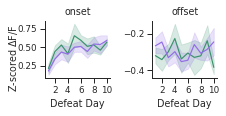

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  260
Model:                                 GEE   No. clusters:                       27
Method:                        Generalized   Min. cluster size:                   8
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                 9.6
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Mon, 20 Jun 2022   Scale:                           0.124
Covariance type:                    robust   Time:                         16:49:51
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4852      0.092      5.257      0.000       0.304       0.666
si     

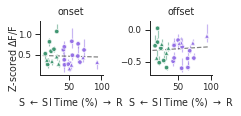

In [3]:
## Fig. 3b and Fig. 3c

d = pd.read_csv('F3bc.csv')
_ = make_behavior_plots(d, 
                        offset=0.5, 
                        ylabel='Z-scored $\Delta$F/F',
                          order=['onset','offset'],
                          aspect=1.1,
                          height=1.7,
                       save_names="F3bc")

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


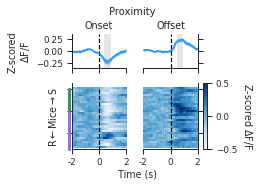

In [72]:
## Fig. 3d

sns.set_context("paper")
sns.set_style('white')


region = "VTA-NAc"

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=sizes[region],sharex=True,sharey='row',gridspec_kw={
                       'width_ratios': [1, 1],
                       'height_ratios': [1, 2]})
im2s=[]
for j,onoff in enumerate(['onset','offset']):

    side=int(onoff=='offset')

    query='group=="GCaMP" and region=="%s" and onoff=="%s"'%(region,onoff)

    im=pd.read_csv('./F3d_%s.csv'%onoff).values
    
    im2=axs[1][j].imshow(im,aspect='auto',cmap=cols[region],vmin=-0.5,vmax=0.5,interpolation='None')

    im2s.append(im2)
    axs[1][j].set_xticks([0,240,479])
    axs[1][j].set_xticklabels([-2,0,2])
    axs[1][j].set_yticks([tick for tick in axs[1][j].get_yticks() if tick>=0])

    axs[1][j].set_ylim(len(im),-int(len(im))/10)

    axs[1][j].plot((240,240),(0,len(im)),linestyle='--',color='k')
    axs[0][j].axvline(x=240,linestyle='--',color='black')
    axs[0][j].set_title(onoff_titles[j])
    axs[0][j].set_ylim([-0.35,0.35])
    plt.suptitle('Proximity',size=10,va='top',ha='left',y=0.91,x=title_poses[region])

    for k in range(2):
        sns.despine(ax=axs[k][1])#,right=False,left=True)
        axs[k][1].spines['left'].set_visible(False)
        axs[k][1].spines['right'].set_visible(True)
        axs[k][1].yaxis.tick_right()
        axs[k][0].yaxis.tick_left()
        axs[k][0].xaxis.tick_bottom()
        axs[k][1].xaxis.tick_bottom()
        sns.despine(ax=axs[k][0])



    means=np.mean(np.array(im),axis=0)
    sterrs=scipy.stats.sem(np.array(im),axis=0)
    axs[0][j].plot(means,color=linecols[region])
    axs[0][j].fill_between(np.arange(len(means)),
                           means-sterrs,
                           means+sterrs,
                           color=linecols[region],
                          alpha=0.5)

    axs[1][1].set_yticklabels([])
    axs[1][0].set_ylabel(r'R$\leftarrow$Mice$\rightarrow$S')
    axs[0][0].set_ylabel('Z-scored\n$\Delta$F/F')
    trans = axs[1][0].get_yaxis_transform()

    axs[1][0].plot([-0.05,-0.05],[0,ns], color=ggp[1], transform=trans, clip_on=False,linewidth=3)
    axs[1][0].plot([-0.05,-0.05],[ns,ns+nr], color=ggp[2], transform=trans, clip_on=False,linewidth=3)

    if i:
        rect = patches.Rectangle((peak_locs[region][j]-30,-0.4),60,1.3,linewidth=0,
                                 alpha=0.2,facecolor='grey')
    else:
        rect = patches.Rectangle((peak_locs[region][j]-30,-0.3),60,0.6,linewidth=0,
                     alpha=0.2,facecolor='grey')
    axs[0][j].add_patch(rect)


cbar_ax = inset_axes(axs[1][1],
           width="8%",  # width = 5% of parent_bbox width
           height="100%",  # height : 50%
           loc='lower left',
           bbox_to_anchor=(1.1, 0., 1, 1),
           bbox_transform=axs[1][1].transAxes,
           borderpad=0,
           )
cbar=fig.colorbar(im2s[1], cax=cbar_ax,ticks=[-0.5, 0, 0.5,1])
cbar.set_label('Z-scored $\Delta$F/F',rotation=-90,va='bottom')
fig.text(0.65, 0.0, 'Time (s)', ha='center')

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=None)
for ax in plt.gcf().axes:
    try:
        ax.label_outer()
    except:
        pass
plt.savefig("F3d.pdf", transparent=True,bbox_inches='tight')
plt.show()

260
15 10
onset 1 -0.19311553960976494 0.8485636735762087
15 10
onset 2 2.347102420297391 0.027898180920217643
16 11
onset 3 1.5944510076954188 0.12340085252044926
16 11
onset 4 1.4459236093968513 0.16061961499571265
16 11
onset 5 1.0191344035030456 0.3179009309710903
16 10
onset 6 0.5354047786859235 0.5972968729860877
15 10
onset 7 0.8953299222506668 0.3798856094349614
15 11
onset 8 1.2747132525160272 0.21461442766579475
16 10
onset 9 1.1368621974584947 0.2668199613994976
15 11
onset 10 0.14363283821693204 0.8869896192671047
onset [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  260
Model:                                 GEE   No. clusters:                       27
Method:                        Generalized   Min. cluster size:                   8
                      Estimating Equations   Max. cluster size: 

<Figure size 720x720 with 0 Axes>

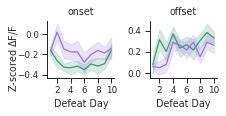

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  260
Model:                                 GEE   No. clusters:                       27
Method:                        Generalized   Min. cluster size:                   8
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                 9.6
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Mon, 20 Jun 2022   Scale:                           0.084
Covariance type:                    robust   Time:                         16:50:04
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3558      0.052     -6.877      0.000      -0.457      -0.254
si     

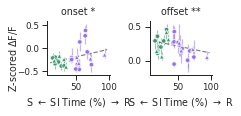

In [4]:
## Fig. 3d and Fig. 3e

d = pd.read_csv('F3ef.csv')
_ = make_behavior_plots(d, 
                        offset=0.5, 
                        ylabel='Z-scored $\Delta$F/F',
                          order=['onset','offset'],
                          aspect=1.1,
                          height=1.7,
                        save_names="F3ef")

In [320]:
d.query('sex=="female"')

,m,d,c,t,r2s,rb,si,sex,stage
18,415,1,onset,-0.206034,2,0,16.906133,female,early
19,415,1,offset,0.265968,2,0,16.906133,female,early
20,415,2,onset,-0.219249,2,0,16.906133,female,early
21,415,2,offset,1.130547,2,0,16.906133,female,early
22,415,3,onset,-0.335565,2,0,16.906133,female,early
...,...,...,...,...,...,...,...,...,...
515,432,8,offset,-0.037940,39,1,93.905333,female,late
516,432,9,onset,-0.149054,39,1,93.905333,female,late
517,432,9,offset,0.320064,39,1,93.905333,female,late
518,432,10,onset,-0.147121,39,1,93.905333,female,late


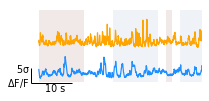

In [311]:
## Fig. 3g

d = pd.read_csv('F3g.csv')

THRESH = 15
WINDOW = 2*30


fig,ax=plt.subplots(1,1,figsize=(3,1.5))

plt.plot(np.array(d.nac)+10,color='dodgerblue')
plt.plot(np.array(d.ts)+20,color='orange')

for side,color in zip(['social','object'],['lightsteelblue','rosybrown']):
    dist = d['dist_%s'%side].values
    onsets=np.where(np.logical_and(dist[:-1]>THRESH,dist[1:]<=THRESH))[0]
    sparse_onsets=[o for o in onsets if o>WINDOW and o<len(dist)-WINDOW and np.sum(dist[o-WINDOW:o-1]<THRESH)==0]
    offsets=np.where(np.logical_and(dist[1:]>THRESH,dist[:-1]<THRESH))[0]
    sparse_offsets=[o for o in offsets if o>WINDOW and o<len(dist)-WINDOW and np.sum(dist[o+1:o+WINDOW]<THRESH)==0]
    if dist[0]<THRESH:
        sparse_onsets_plt=[0]+list(onsets)
    else:
        sparse_onsets_plt=onsets
    if dist[-1]<THRESH:
        sparse_offsets_plt=list(offsets)+[len(dist)-1]
    else:
        sparse_offsets_plt=list(offsets)

    for on, off in zip(sparse_onsets_plt,sparse_offsets_plt):
        ax.add_patch( Rectangle((on, 7),
                        off-on, 23,
                        fc =color, 
                        ec ='none',
                        lw = 0,
                               alpha=0.2) )
plt.xticks(30*60*np.arange(5),np.arange(5))
plt.yticks([])
plt.xlim(-70,1200)
plt.vlines(x=-60,ymin=6.5,ymax=11.5,color='k',linewidth=1)
plt.axis('off')
plt.hlines(y=6.5,xmin=-60,xmax=8*30,color='k',linewidth=1)
plt.text(-68,9,'5$\sigma$\n$\Delta$F/F',va='center',ha='right',color='k')
plt.text(4*30,4.7,'10 s',va='center',ha='center',color='k')
plt.savefig("F3g.pdf", transparent=True,bbox_inches='tight')
plt.show()

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


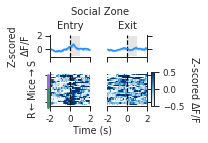

In [17]:
## Fig. 3h

cols="Blues"
linecols='dodgerblue'
onoff_titles=['Entry','Exit']
ggp=np.array([[0.133     , 0.133     , 0.133     , 1.        ],
       [0.22953434, 0.57685998, 0.42976558, 1.        ],
       [0.57609486, 0.42953354, 0.90002989, 1.        ]])
size=(2.3,2)

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=size,sharex=True,sharey='row',gridspec_kw={
                       'width_ratios': [1, 1],
                       'height_ratios': [1, 1.5]})
im2s=[]
for j,onoff in enumerate(['onset','offset']):

    side=int(onoff=='offset')
    sns.set_context("paper")
    sns.set_style('white')


    im=pd.read_csv('F3h_%s.csv'%onoff).values

    im2=axs[1][j].imshow(im,aspect='auto',cmap=cols,vmin=-0.5,vmax=0.5,
                        interpolation='None')


    im2s.append(im2)
    axs[1][j].set_xticks([0,60,119])
    axs[1][j].set_xticklabels([-2,0,2])
    axs[1][j].set_yticks([tick for tick in axs[1][j].get_yticks() if tick>=0])

    axs[1][j].set_ylim(len(im),-int(len(im))/10)

    axs[1][j].plot((60,60),(0,len(im)),linestyle='--',color='k')
    axs[0][j].axvline(x=60,linestyle='--',color='black')
    axs[0][j].set_title(onoff_titles[j],fontsize=10)

    for k in range(2):
        sns.despine(ax=axs[k][1])#,right=False,left=True)
        axs[k][1].spines['left'].set_visible(False)
        axs[k][1].spines['right'].set_visible(True)
        axs[k][1].yaxis.tick_right()
        axs[k][0].yaxis.tick_left()
        axs[k][0].xaxis.tick_bottom()
        axs[k][1].xaxis.tick_bottom()
        sns.despine(ax=axs[k][0])

    axs[1][1].set_yticklabels([])
    axs[1][0].set_ylabel('Mice')
    axs[0][0].set_ylabel('Z-scored\n%s $\Delta$F/F')
    plt.suptitle('Social Zone',size=10,va='top',ha='left',y=0.88,x=0.45)

    means=np.mean(np.array(im),axis=0)
    sterrs=scipy.stats.sem(np.array(im),axis=0)
    axs[0][j].plot(means,color=linecols)
    axs[0][j].fill_between(np.arange(len(means)),
                           means-sterrs,
                           means+sterrs,
                           color=linecols,
                          alpha=0.5)

    if i==0:
        rect = patches.Rectangle((45,-1),30,3,linewidth=0,
                         alpha=0.2,facecolor='grey')
    else:
        rect = patches.Rectangle((60,-1),30,3,linewidth=0,
                         alpha=0.2,facecolor='grey')
    axs[0][j].add_patch(rect)

axs[1][1].set_yticklabels([])
axs[1][0].set_ylabel(r'R$\leftarrow$Mice$\rightarrow$S')
axs[0][0].set_ylabel('Z-scored\n$\Delta$F/F')
trans = axs[1][0].get_yaxis_transform()

axs[1][0].plot([-0.05,-0.05],[0,10], color=ggp[2], transform=trans, clip_on=False,linewidth=3)
axs[1][0].plot([-0.05,-0.05],[10,24], color=ggp[1], transform=trans, clip_on=False,linewidth=3)

cbar_ax = inset_axes(axs[1][1],
           width="8%",  # width = 5% of parent_bbox width
           height="100%",  # height : 50%
           loc='lower left',
           bbox_to_anchor=(1.1, 0., 1, 1),
           bbox_transform=axs[1][1].transAxes,
           borderpad=0,
           )
cbar=fig.colorbar(im2s[1], cax=cbar_ax,ticks=[-0.5, 0, 0.5,1])
cbar.set_label('Z-scored $\Delta$F/F',rotation=-90,va='bottom')
fig.text(0.58, 0.0, 'Time (s)', ha='center')

plt.tight_layout(pad=1,h_pad=2) 
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for ax in plt.gcf().axes:
    try:
        ax.label_outer()
    except:
        pass
plt.savefig("F3h.pdf", transparent=True,bbox_inches='tight')
plt.show()


0.010204984537875925
0.061835032821420895


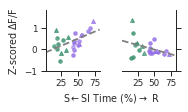

In [22]:
## Fig. 3i

d = pd.read_csv('F3i.csv')

sex2size = {'male':12,
             'female':15}
sex2marker = {'male':'o',
             'female':'^'}

r2color = {True:ggp[2],
          False:ggp[1]}

fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(2.7,1.6),sharey=True)
sns.set_context('paper')
sns.set_style('ticks')

for i,onoff in enumerate(['onset','offset']):
    for sex in ['male','female']:
        for r in [True,False]:
            d_r = d.query('onoff=="%s" and sex=="%s" and resilience==%d'%(onoff, sex,r))
            sns.regplot(d_r.si,d_r.nac,
                        scatter_kws={'s':sex2size[sex]},
                        color=r2color[r],ci=0,
                        line_kws={'linewidth':0,
                                  'color':'white'},
                        ax=axs[i],
                       marker=sex2marker[sex])
    d_onoff = d.query('onoff=="%s"'%onoff)
    sns.regplot(d_onoff.si,d_onoff.nac,
                ci=0,scatter_kws={'s':0},
                line_kws={'linestyle':'--',
                          'color':'grey'},
                ax=axs[i])
    r,p = scipy.stats.pearsonr(d_onoff.si,d_onoff.nac)
    print(p)
#     axs[i].text(y=1.5,x=14+15*i,s='R=%.2f\np=%.2f'%(r,p))
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')


axs[0].set_ylabel('Z-scored $\Delta$F/F')
plt.xlabel(r'S$\leftarrow$SI Time (%)$\rightarrow$ R',x=-0.2)

axs[0].set_ylim(-1,1.8)
sns.despine()
axs[1].spines['left'].set_visible(False)
axs[1].spines['right'].set_visible(True)
axs[1].yaxis.tick_right()
axs[0].yaxis.tick_left()
axs[0].xaxis.tick_bottom()
axs[1].xaxis.tick_bottom()

fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.3)
plt.savefig("F3i.pdf", transparent=True,bbox_inches='tight')
plt.show()


## FIGURE 4

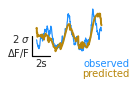

In [18]:
## Fig. 4a

d = pd.read_csv('F4a.csv')

ax=plt.figure(figsize=(2.,1.3))

plt.plot(d.obs,
         label='true',color='dodgerblue')

plt.plot(d.pred,
         label='predicted',color='darkgoldenrod',
        linewidth=2)

plt.text(120*10,-2.8,'observed',horizontalalignment='right',
            verticalalignment='center',color='dodgerblue',
            size=10)
plt.text(120*10,-3.9,'predicted',horizontalalignment='right',
            verticalalignment='center',color='darkgoldenrod',
            size=10)

plt.axis('off')
plt.plot([-60,180],[-2,-2],color='k')
plt.text(60,-2.8,'2s',horizontalalignment='center',
            verticalalignment='center',
            size=10)
plt.plot([-60,-60],[-2,0],color='k')
plt.text(-80,-1,'2 $\sigma$\n$\Delta$F/F',horizontalalignment='right',
            verticalalignment='center',
            size=10)
plt.savefig("F4a.pdf", transparent=True,bbox_inches='tight')
plt.show()

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


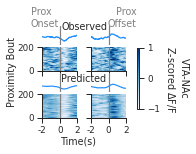

In [23]:
## Fig. 4b

d_obs_on = pd.read_csv('F4b_obs_on.csv').values
d_obs_off = pd.read_csv('F4b_obs_off.csv').values
d_pred_on = pd.read_csv('F4b_pred_on.csv').values
d_pred_off = pd.read_csv('F4b_pred_off.csv').values

fig,axs=plt.subplots(nrows=4,ncols=2,figsize=(1.5,1.7),sharex=True,sharey='row',
                    gridspec_kw={'height_ratios':[1,1.2,1,1.2],'hspace': 0.1,'wspace':0.4})

im=axs[1][0].imshow(d_obs_on,aspect='auto',vmin=-1,vmax=1,cmap='Blues')
axs[0][0].plot(np.mean(d_obs_on,axis=0),color='dodgerblue')
axs[3][0].imshow(d_pred_on,aspect='auto',vmin=-1.5,vmax=2,cmap='Blues')
axs[2][0].plot(np.mean(d_pred_on,axis=0),color='dodgerblue')
axs[1][1].imshow(d_obs_off,aspect='auto',vmin=-1,vmax=1,cmap='Blues')
axs[0][1].plot(np.mean(d_obs_off,axis=0),color='dodgerblue')
axs[3][1].imshow(d_pred_off,aspect='auto',vmin=-1.5,vmax=2,cmap='Blues')
axs[2][1].plot(np.mean(d_pred_off,axis=0),color='dodgerblue')

for a in axs[[1,3]]:
    for ax in a:
        ax.set_ylim(0,200)
        sns.despine()
        ax.axvline(x=240,color='grey')
        ax.set_xticks([0,240,480])
        ax.set_xticklabels([-2,0,2])
        
for a in axs[[0,2]]:
    for ax in a:
        ax.axis('off')
        
        ax.axvline(x=240,color='grey')
axs[2][0].set_ylim(-2,5)
axs[0][0].set_ylim(-1,1.5)

fig.text(-0.2, 0.5, 'Proximity Bout', va='center', rotation='vertical')
fig.text(0.3, -0.07, 'Time(s)', va='center', )
fig.text(0.3, 0.44, 'Predicted', va='center', )
fig.text(0.3, 0.87, 'Observed', va='center', )
fig.text(0.02, 0.87, 'Prox\nOnset', color='grey')
fig.text(1, 0.87, 'Prox\nOffset', ha='right', color='grey')
position=fig.add_axes([1,0.2,0.02,0.5])
cbar=fig.colorbar(im,ax=axs,fraction=0.018,cax=position)

cbar.set_label('VTA-NAc\n Z-scored $\Delta$F/F',rotation=-90, va="bottom")
plt.subplots_adjust(hspace=0.0001)
plt.savefig("F4b.pdf", transparent=True,bbox_inches='tight')

plt.show()

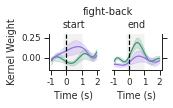

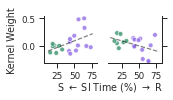

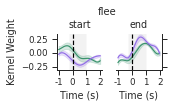

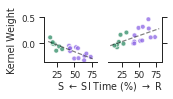

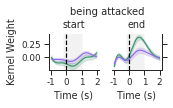

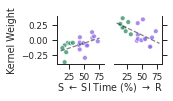

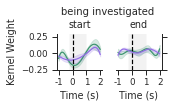

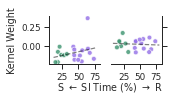

In [26]:
## Fig. 4c

from matplotlib import patches
from matplotlib import rc
from matplotlib import rcParams, rcParamsDefault
from sklearn.linear_model import LinearRegression
sns.set_style('ticks')

d_top = pd.read_csv('F4c_top.csv')
d_bottom = pd.read_csv('F4c_bottom.csv')


lims=[(-0.15,0.3),
      (-0.3,0.35),
      (-0.24,0.46),
      (-0.25,0.3)]

titles=['fightback start','fightback end',
 'runaway start','runaway end',
 'attack start','attack end',
 'sniffing start','sniffing end']

titles2=['fight-back start','fight-back end',
 'flee start','flee end',
 'being attacked start','being attacked end',
 'being sniffed start','being sniffed end']


for k in range(int(len(titles)/2)):
    pi=0
    fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(2.5,1.7),sharey=True,sharex=True)
    for onoff in range(2):
        t_i=k*2+pi
        title=titles[t_i]

        ax=axs[int(pi)]
        
        for i_rb,rb in enumerate(['susceptible','resilient']):
            subd = d_top.query('behavior == %d and rb=="%s" and onoff==%d'%(k,rb,onoff))
            ax.plot(np.arange(len(subd['time'])),subd['mean'],color=ggp[1+i_rb])
            ax.fill_between(np.arange(len(subd['time'])),
                            subd['mean']-subd['sem'],
                            subd['mean']+subd['sem'],
                            alpha=0.2,label=rb,
                             color=ggp[1+i_rb])

        ax.axvline(x=120,color='k',linestyle='--')
        ax.set_xticks(np.arange(3.1)*120)
        ax.set_xticklabels(np.arange(3.001).astype(int)-1)
        ax.set_title(titles2[t_i].split(' ')[-1])
        ax.set_xlabel('Time (s)')
        if 'end' in title:
            sns.despine(ax=ax)
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(True)
            ax.yaxis.tick_right()
        else:
            sns.despine(ax=ax)

        ax.set_title('%s'%(ax.get_title()),horizontalalignment='center')
        rect = patches.Rectangle((90, -0.5), 240-90, 1, linewidth=1, edgecolor=None, facecolor='grey',
                                zorder=0,alpha=0.1)

        ax.add_patch(rect)
        ax.set_ylim(lims[k])
        pi+=1

    mid = (fig.subplotpars.right + fig.subplotpars.left)/5*3
    plt.suptitle(titles2[t_i].replace(' start','').replace(' end',''),size=10,y=0.85,x=mid,
                 ha='center')
    if 'sniff' in titles2[t_i]:
        plt.suptitle('being investigated',size=10,y=0.85,x=mid,ha='center')
    axs[0].set_ylabel('Kernel Weight')
    plt.tight_layout()
    plt.savefig("F4c_%d_%d_kernel.pdf"%(k,onoff), transparent=True,bbox_inches='tight')
    plt.show()
    
    title_test=titles2[t_i]
    if 'sniff' in titles2[t_i]:
        title_test='investigated end'
    title_test=title_test.replace("being ",'')
    title_final=title_test.replace('end','start')
    
    fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(2.5,1.2),sharey=True,sharex=True)

    for i,tt in enumerate([title_final,title_test]):
        test=d_bottom.query('c=="%s"'%tt)[['m','t','rb','si']].drop_duplicates()
        sns.scatterplot(data=test,x='si',y='t',ax=axs[i],hue='rb',legend=False,palette=ggp[[1,2]],alpha=0.8)

        lr = LinearRegression()
        lr.fit(test.si.values.reshape(-1, 1),test.t.values,)
        abline(lr.coef_, lr.intercept_,axs[i])
        
    sns.despine(ax=ax)
    axs[1].spines['left'].set_visible(False)
    axs[1].spines['right'].set_visible(True)
    axs[1].spines['top'].set_visible(False)
    axs[1].yaxis.tick_right()
    axs[0].set_ylabel('Kernel Weight')
    for ax in axs: ax.set_xlabel('')

    sns.despine(ax=axs[0])
    plt.tight_layout()

    fig.text(0.63,0.02,r'S $\leftarrow$ SI Time (%) $\rightarrow$ R',ha='center')
    plt.savefig("F4c_%d_%d_scatter.pdf"%(k,onoff), transparent=True,bbox_inches='tight')
    plt.show()

## FIGURE 5

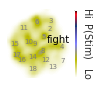

In [180]:
## Fig. 5c

d = pd.read_csv('F5c.csv').values

sns.set_style('dark')

plt.figure(figsize=(1.5,1.5))
im=plt.imshow(d,origin='lower',cmap='gist_stern_r',vmin=0,vmax=0.005)
plt.axis('off')
peakx=[5, 6, 10, 11, 15, 18, 18, 19, 21, 25, 26, 27, 30, 31, 32, 36, 39, 39]
peaky=[24, 16, 13, 36, 26, 6, 15, 24, 40, 19, 29, 13, 35, 41, 8, 27, 12, 22]
for j in np.unique((labeled_map).flatten()):
    x=peakx[int(j)-1]
    y=peaky[int(j)-1]
    if np.where(np.argsort(tsne_dists)==int(j)-1)[0][0]+1 != 1:
        plt.text(x,y,np.where(np.argsort(tsne_dists)==int(j)-1)[0][0]+1,size=7,
                verticalalignment='center',
                horizontalalignment='center',
                color='grey')
    else:
        plt.text(x,y,'fight',size=10,
                verticalalignment='center',
                horizontalalignment='center',
                color='black')
cbar=plt.colorbar(im,fraction=0.048,orientation='vertical',pad=-0.04)
cbar.set_ticks([])
plt.subplots_adjust(wspace=0, hspace=0)
cbar.set_label('Hi  $P$(Stim)   Lo',rotation=-90,va='bottom')
plt.show()

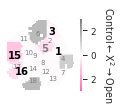

In [187]:
## Fig. 5d

d = pd.read_csv('F5d.csv').values

from matplotlib.colors import LinearSegmentedColormap
PiBr = LinearSegmentedColormap.from_list(
        "Custom", ['hotpink','white','gray'], N=40)

plt.figure(figsize=(1.8,1.6))
z=np.zeros(labeled_map.shape)
for i in np.unique(labeled_map.flatten()):
    if i in range(1,19):
        x=peakx[int(i)-1]
        y=peaky[int(i)-1]
        if np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1 in [1,3,15,16]:
            plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
                     size=10,
                    verticalalignment='center',
                    horizontalalignment='center',
                    color='k', weight='bold')
        elif np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1==5:
            plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
                     size=10,
                    verticalalignment='center',
                    horizontalalignment='center',
                    color='grey',weight='bold')
        else:
            plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
                     size=7,
                    verticalalignment='center',
                    horizontalalignment='center',
                    color='grey')



im=plt.imshow(d,origin='lower',vmin=-3,vmax=3,
            cmap=PiBr)

cbar=plt.colorbar(im,fraction=0.048,orientation='vertical',pad=0.02)
cbar.set_ticks([2,0,-2])
cbar.set_ticklabels([2,0,2])
cbar.set_label(r'Control$\leftarrow$$X^2$$\rightarrow$Open',rotation=-90,va='bottom')
plt.axis('off')
plt.tight_layout()

plt.show()


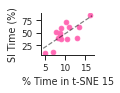

In [27]:
## Fig. 5e

d = pd.read_csv('F5e.csv')

b=d.SI_time
a=d.t


sns.set_style('ticks')

fig,ax=plt.subplots(1,1,figsize=(1.5,1.3))

plt.scatter(a,b,color='hotpink')

plt.ylabel('SI Time (%)')
plt.xlabel('% Time in t-SNE 15')
lr = LinearRegression()
lr.fit(a.values.reshape(-1, 1),b)
    
abline(lr.coef_, lr.intercept_,ax=ax)
sns.despine()
plt.savefig("F5e.pdf", transparent=True,bbox_inches='tight')
plt.show()

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


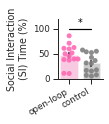

In [57]:
## Fig. 5f

d = pd.read_csv('F5f.csv')

sns.set_style('ticks')

fig,ax = plt.subplots(figsize=(0.8,1.1))

ppal=['hotpink','grey',]
pord=['open-loop','no opsin control']

g=sns.barplot(data=d, order=pord,
            x='group', y='SI_time',ci=68,
              palette=ppal,alpha=0.4)
g=sns.swarmplot(data=d, order=pord,
                x='group', y='SI_time',
                alpha=0.9, palette=ppal)
plt.xticks([0,1],
           ['open-loop','control'],
           rotation=30,ha='right')
sns.despine()
plt.ylabel('Social Interaction\n(SI) Time (%)')
plt.xlabel('')
plt.ylim(0,120)

plt.plot([0,1],[100,100],color='k')
plt.text(0.5,105,'*',color='k',horizontalalignment='center')
plt.savefig("F5f.pdf", transparent=True,bbox_inches='tight')
plt.show()

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


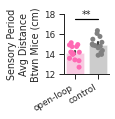

In [58]:
## Fig. 5g

d = pd.read_csv('F5g.csv')

plt.figure(figsize=(0.8,1.1))
sns.barplot(data=d,x='g',y='t',order=pord,
            palette=ppal,alpha=0.4,ci=68)
sns.stripplot(data=d,x='g',y='t',order=pord,
              palette=ppal,jitter='0.25')
plt.ylim(12,18)
sns.despine()
plt.xticks([0,1],['open-loop','control'],rotation=30,ha='right')
plt.xlabel('')
plt.ylabel('Sensory Period\nAvg Distance\nBtwn Mice (cm)')
plt.plot([0,1],[17.5,17.5],color='k')
plt.text(0.5,17.5,'**',va='bottom',ha='center')
plt.savefig("F5g.pdf", transparent=True,bbox_inches='tight')
plt.show()

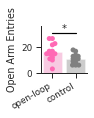

In [59]:
## Fig. 5h

d = pd.read_csv('F5h.csv')

plt.figure(figsize=(1.4,1.5))
sns.set_style('ticks')
sns.barplot(data=d,x='group',y='freq_open',
            order=pord,
            palette=ppal,
            ci=68,alpha=0.4)
sns.swarmplot(data=d,x='group',y='freq_open',
              order=pord,
              palette=ppal)

sns.despine()
plt.xlabel('')
plt.ylabel('Open Arm Entries')
plt.ylim(0,37)
plt.plot([0,1],[31,31],color='k')
plt.text(0.5,31,'*',va='bottom',ha='center',size=10)
plt.xticks([0,1],['open-loop','control'],rotation=30,ha='right')
plt.savefig("F5h.pdf", transparent=True,bbox_inches='tight')
plt.show()


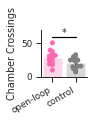

In [60]:
## Fig. 5i

d = pd.read_csv('F5i.csv')

plt.figure(figsize=(1.4,1.5))

g=sns.swarmplot(data=d,x='g',y='crossings',palette=ppal,order=pord)
g=sns.barplot(data=d,x='g',y='crossings',ci=68,alpha=0.3,palette=ppal,order=pord)
plt.xticks([0,1],['open-loop','control'],rotation=30,ha='right')
plt.ylabel('Chamber Crossings')
plt.xlabel('')
plt.ylim(0,70)
plt.plot([0,1],[59,59],color='k')
plt.text(0.5,59,'*',va='bottom',ha='center')
sns.despine()

plt.savefig("F5i.pdf", transparent=True,bbox_inches='tight')

plt.show()

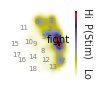

In [181]:
## Fig. 5j
d = pd.read_csv('F5j.csv').values

sns.set_style('dark')

plt.figure(figsize=(1.5,1.5))
im=plt.imshow(d,origin='lower',cmap='gist_stern_r',vmin=0,vmax=0.005)
plt.axis('off')
peakx=[5, 6, 10, 11, 15, 18, 18, 19, 21, 25, 26, 27, 30, 31, 32, 36, 39, 39]
peaky=[24, 16, 13, 36, 26, 6, 15, 24, 40, 19, 29, 13, 35, 41, 8, 27, 12, 22]
for j in np.unique((labeled_map).flatten()):
    x=peakx[int(j)-1]
    y=peaky[int(j)-1]
    if np.where(np.argsort(tsne_dists)==int(j)-1)[0][0]+1 != 1:
        plt.text(x,y,np.where(np.argsort(tsne_dists)==int(j)-1)[0][0]+1,size=7,
                verticalalignment='center',
                horizontalalignment='center',
                color='grey')
    else:
        plt.text(x,y,'fight',size=10,
                verticalalignment='center',
                horizontalalignment='center',
                color='black')
cbar=plt.colorbar(im,fraction=0.048,orientation='vertical',pad=-0.04)
cbar.set_ticks([])
plt.subplots_adjust(wspace=0, hspace=0)
cbar.set_label('Hi  $P$(Stim)   Lo',rotation=-90,va='bottom')
plt.show()

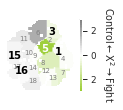

In [188]:
## Fig. 5k

d = pd.read_csv('F5k.csv')

YGBr = LinearSegmentedColormap.from_list(
        "Custom", ['yellowgreen','white','gray'], N=40)

sns.set_context("paper")
sns.set_style("dark")
plt.figure(figsize=(1.8,1.6))
z=np.zeros(labeled_map.shape)
for i in np.unique(labeled_map.flatten()):
    if i in range(1,19):
        x=peakx[int(i)-1]
        y=peaky[int(i)-1]
        if np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1 in [1,3,15,16]:
            plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
                     size=10,
                    verticalalignment='center',
                    horizontalalignment='center',
                    color='k', weight='bold')
        elif np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1==5:
            plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
                     size=10,
                    verticalalignment='center',
                    horizontalalignment='center',
                    color='white',weight='bold')
        else:
            plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
                     size=7,
                    verticalalignment='center',
                    horizontalalignment='center',
                    color='grey')

im=plt.imshow(d,origin='lower',vmin=-3,vmax=3,
            cmap=YGBr)

cbar=plt.colorbar(im,fraction=0.048,orientation='vertical',pad=0.02)
cbar.set_ticks([2,0,-2])
cbar.set_ticklabels([2,0,2])
cbar.set_label(r'Control$\leftarrow$$X^2$$\rightarrow$Fight',rotation=-90,va='bottom')
plt.axis('off')
plt.tight_layout()

plt.show()

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


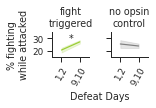

In [51]:
## Fig. 5l

d = pd.read_csv('F5l.csv')

sns.set_style('ticks')

ppal=['yellowgreen','grey']
pord=['closed-loop','no opsin control']


g=sns.relplot(data=d,
              x='earlylate',y='t',hue='group',
              ci=68,kind='line',
              palette=ppal,
              hue_order=pord,
              col_order=pord,
              sort=False,col='group',
             height=1.6,aspect=0.7,legend=False)
for l,a in zip(['fight\ntriggered','no opsin\ncontrol'],g.axes[0]):
    a.set_title(l)
    a.set_xlim(-0.5,1.5)
    a.set_xticklabels(['1,2','9,10'],rotation=60)
    a.set_xlabel('')
    a.set_ylim(15,35)
g.axes[0][1].set_xlabel('Defeat Days',ha='right')
g.axes[0][0].set_ylabel('% fighting\nwhile attacked')
g.axes[0][0].text(0.5,28,'*',ha='center')
plt.tight_layout()
plt.savefig("F5l.pdf", transparent=True,bbox_inches='tight')
plt.show()

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


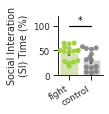

In [66]:
## Fig. 5m

d = pd.read_csv('F5m.csv')

sns.set_style('ticks')

fig,ax = plt.subplots(figsize=(0.8,1.1))


g=sns.barplot(data=d, order=pord,
            x='group',y='SI_time',ci=68,
              palette=ppal,alpha=0.4)
g=sns.swarmplot(data=d,alpha=0.9,
            x='group',y='SI_time', order=pord,
           palette=ppal)
plt.xticks([0,1],
           ['fight','control'],
           rotation=30,ha='right')
sns.despine()
plt.ylabel('Social Interation\n(SI) Time (%)')
plt.xlabel('')
plt.ylim(0,120)

plt.plot([0,1],[100,100],color='k')
plt.text(0.5,105,'*',color='k',horizontalalignment='center')
plt.savefig("F5m.pdf", transparent=True,bbox_inches='tight')
plt.show()


/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


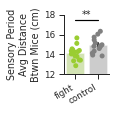

In [63]:
## Fig. 5n

d = pd.read_csv('F5n.csv')

ppal=['yellowgreen','grey',]
pord=['closed-loop','no opsin control',]

plt.figure(figsize=(0.8,1.1))
sns.barplot(data=d,x='g',y='t',order=pord,
            palette=ppal,alpha=0.4,ci=68)
sns.stripplot(data=d,x='g',y='t',order=pord,
              palette=ppal,jitter='0.25')
plt.ylim(12,18)
sns.despine()
plt.xticks([0,1],['fight','control'],rotation=30,ha='right')
plt.xlabel('')
plt.ylabel('Sensory Period\nAvg Distance\nBtwn Mice (cm)')
plt.plot([0,1],[17.5,17.5],color='k')
plt.text(0.5,17.5,'**',va='bottom',ha='center')
plt.savefig("F5n.pdf", transparent=True,bbox_inches='tight')
plt.show()

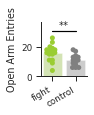

In [64]:
## Fig. 5o

d = pd.read_csv('F5o.csv')

plt.figure(figsize=(1.4,1.5))
sns.set_style('ticks')
sns.barplot(data=d,x='group',y='freq_open',
            order=pord,
            palette=ppal,
            ci=68,alpha=0.4)
sns.swarmplot(data=d,x='group',y='freq_open',
              order=pord,
              palette=ppal)

sns.despine()
plt.xlabel('')
plt.ylabel('Open Arm Entries')
plt.ylim(0,37)
plt.plot([0,1],[31,31],color='k')
plt.text(0.5,31,'**',va='bottom',ha='center',size=10)
plt.xticks([0,1],['fight','control'],rotation=30,ha='right')
plt.savefig("F5o.pdf", transparent=True,bbox_inches='tight')
plt.show()


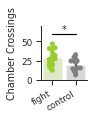

In [65]:
## Fig. 5p

d = pd.read_csv('F5p.csv')

plt.figure(figsize=(1.4,1.5))

g=sns.swarmplot(data=d,x='g',y='crossings',palette=ppal)#,ci=68)
g=sns.barplot(data=d,x='g',y='crossings',ci=68,alpha=0.3,palette=ppal)
plt.xticks([0,1],['fight','control'],rotation=30,ha='right')
plt.ylabel('Chamber Crossings')
plt.xlabel('')
plt.ylim(0,70)
plt.plot([0,1],[59,59],color='k')
plt.text(0.5,59,'*',va='bottom',ha='center')

sns.despine()
plt.savefig("F5p.pdf", transparent=True,bbox_inches='tight')
plt.show()


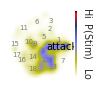

In [185]:
## Fig. 5q
d = pd.read_csv('F5q.csv').values

sns.set_style('dark')

plt.figure(figsize=(1.5,1.5))
im=plt.imshow(d,origin='lower',cmap='gist_stern_r',vmin=0,vmax=0.005)
plt.axis('off')
peakx=[5, 6, 10, 11, 15, 18, 18, 19, 21, 25, 26, 27, 30, 31, 32, 36, 39, 39]
peaky=[24, 16, 13, 36, 26, 6, 15, 24, 40, 19, 29, 13, 35, 41, 8, 27, 12, 22]
for j in np.unique((labeled_map).flatten()):
    x=peakx[int(j)-1]
    y=peaky[int(j)-1]
    if np.where(np.argsort(tsne_dists)==int(j)-1)[0][0]+1 != 4:
        plt.text(x,y,np.where(np.argsort(tsne_dists)==int(j)-1)[0][0]+1,size=7,
                verticalalignment='center',
                horizontalalignment='center',
                color='grey')
    else:
        plt.text(x,y,'attack',size=10,
                verticalalignment='center',
                horizontalalignment='center',
                color='black')
cbar=plt.colorbar(im,fraction=0.048,orientation='vertical',pad=-0.04)
cbar.set_ticks([])
plt.subplots_adjust(wspace=0, hspace=0)
cbar.set_label('Hi  $P$(Stim)   Lo',rotation=-90,va='bottom')
plt.show()

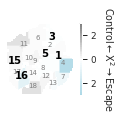

In [233]:
## Fig. 5r

d = pd.read_csv('F5r.csv').values

sns.set_context("paper")
sns.set_style("dark")

cm = LinearSegmentedColormap.from_list(
        "Custom", ['lightblue','white','grey'], N=40)

plt.figure(figsize=(1.8,1.6))
for i in np.unique(labeled_map.flatten()):
    if i in range(1,19):
        x=peakx[int(i)-1]
        y=peaky[int(i)-1]
        if np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1 in [1,3,5,15,16]:
            plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
                     size=10,
                    verticalalignment='center',
                    horizontalalignment='center',
                    color='k', weight='bold')
        else:
            plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
                     size=7,
                    verticalalignment='center',
                    horizontalalignment='center',
                    color='grey')
            
im=plt.imshow(d,origin='lower',vmin=-3,vmax=3,
            cmap=cm)

cbar=plt.colorbar(im,fraction=0.048,orientation='vertical',pad=0.02)
cbar.set_ticks([2,0,-2])
cbar.set_ticklabels([2,0,2])
cbar.set_label(r'Control$\leftarrow$$X^2$$\rightarrow$Escape',rotation=-90,va='bottom')
plt.axis('off')
plt.tight_layout()
plt.show()


/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


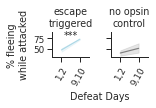

In [42]:
## Fig. 5s

d = pd.read_csv('F5s.csv')

sns.set_style('ticks')

ppal=['lightblue','grey']
pord=['attack-offset-stim','no opsin control']


g=sns.relplot(data=d,
              x='earlylate',y='t',hue='group',
              ci=68,kind='line',
              palette=ppal,
              hue_order=pord,
              col_order=pord,
              sort=False,col='group',
             height=1.6,aspect=0.7,legend=False)
for l,a in zip(['escape\ntriggered','no opsin\ncontrol'],g.axes[0]):
    a.set_title(l)
    a.set_xlim(-0.5,1.5)
    a.set_ylim(30,90) 
    a.set_xticklabels(['1,2','9,10'],rotation=60)
    a.set_xlabel('')
g.axes[0][1].set_xlabel('Defeat Days',ha='right')
g.axes[0][0].set_ylabel('% fleeing\nwhile attacked')
g.axes[0][0].text(0.5,75,'***',ha='center')
plt.tight_layout()
plt.savefig("F5s.pdf", transparent=True,bbox_inches='tight')
plt.show()

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


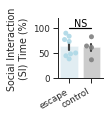

In [43]:
## Fig. 5t

d = pd.read_csv('F5t.csv')

sns.set_style('ticks')

ppal=['lightblue','grey']
pord=['attack-offset-stim','no opsin control']

fig,ax = plt.subplots(figsize=(.8,1.1))

g=sns.barplot(data=d, order=pord,
            x='group',y='SI_time',ci=68,
              palette=ppal,alpha=0.4)
g=sns.swarmplot(data=d,
            x='group',y='SI_time', 
                order=pord,alpha=0.9,
                palette=ppal)
plt.xticks([0,1],
           ['escape','control'],
           rotation=30,ha='right')
sns.despine()
plt.ylabel('Social Interaction\n(SI) Time (%)')
plt.xlabel('')
plt.ylim(0,120)

plt.plot([0,1],[100,100],color='k')
plt.text(0.5,103,'NS',color='k',horizontalalignment='center')
plt.savefig("F5t.pdf", transparent=True,bbox_inches='tight')
plt.show()

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app


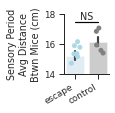

In [44]:
## Fig. 5u

d = pd.read_csv('F5u.csv')

plt.figure(figsize=(.8,1.1))
sns.barplot(data=d,x='g',y='t',order=pord,palette=ppal,alpha=0.4,ci=68)
sns.stripplot(data=d,x='g',y='t',order=pord,palette=ppal,jitter='0.25')
plt.ylim(14,18)
sns.despine()
plt.xticks([0,1],['escape','control'],rotation=30,ha='right')
plt.xlabel('')
plt.ylabel('Sensory Period\nAvg Distance\nBtwn Mice (cm)')
plt.plot([0,1],[17.5,17.5],color='k')
plt.text(0.5,17.5,'NS',va='bottom',ha='center')
plt.savefig("F5u.pdf", transparent=True,bbox_inches='tight')
plt.show()

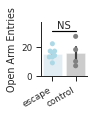

In [45]:
## Fig. 5v

d = pd.read_csv('F5v.csv')

plt.figure(figsize=(1.4,1.5))
sns.barplot(data=d,x='group',y='freq_open',
            order=pord,
            palette=ppal,ci=68,alpha=0.4)
sns.swarmplot(data=d,x='group',y='freq_open',
              order=pord,
              palette=ppal)
plt.xticks([0,1],['escape','control'],rotation=30)

sns.despine()
plt.xlabel('')
plt.ylabel('Open Arm Entries')
plt.ylim(0,37)
plt.plot([0,1],[31,31],color='k')
plt.text(0.5,31,'NS',va='bottom',ha='center',size=10)
plt.xticks(ha='right')
plt.xticks([0,1],['escape','control'],rotation=30)
plt.savefig("F5v.pdf", transparent=True,bbox_inches='tight')
plt.show()

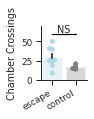

In [46]:
## Fig. 5w

d = pd.read_csv('F5w.csv')

plt.figure(figsize=(1.4,1.5))

g=sns.swarmplot(data=d,x='g',y='crossings',palette=ppal)#,ci=68)
g=sns.barplot(data=d,x='g',y='crossings',ci=68,alpha=0.3,palette=ppal)
plt.xticks([0,1],['escape','control'],rotation=30,ha='right')
plt.ylabel('Chamber Crossings')
plt.xlabel('')
plt.ylim(0,70)
plt.plot([0,1],[59,59],color='k')
plt.text(0.5,59,'NS',va='bottom',ha='center')

sns.despine()
plt.savefig("F5w.pdf", transparent=True,bbox_inches='tight')
plt.show()

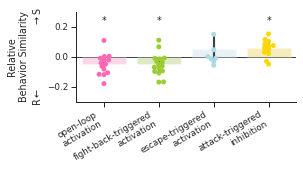

In [47]:
## Fig. 5x

d = pd.read_csv('F5x.csv')

my_ord=['open-loop','closed-loop','attack-offset-stim','attack-inhibition']
my_pal=['hotpink','yellowgreen','lightblue','gold']

plt.figure(figsize=(4.3,2.5))
sns.swarmplot(data=d,x='g',y='diff',
              order=my_ord,
              palette=my_pal)
sns.barplot(data=d,x='g',y='diff',
           palette=my_pal,alpha=0.3,
           order=my_ord)
plt.xticks([0,1,2,3],
           ['open-loop\nactivation',
            'fight-back-triggered\nactivation',
            'escape-triggered\nactivation',
            'attack-triggered\ninhibition'],
           rotation=30,ha='right')
plt.xlabel('')
plt.ylabel('Relative\nBehavior Similarity\n'+r'R$\leftarrow$                    $\rightarrow$S')
plt.axhline(y=0,color='k',zorder=-1,linewidth=0.75)
plt.ylim(-0.3,0.3)
sns.despine()
for i in [0,1,3]:
    plt.text(i,0.24,'*',va='center',ha='center')
plt.savefig("F5x.pdf", transparent=True,bbox_inches='tight')
plt.show()